<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [349]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [113]:
movies = pd.read_csv('/Users/natimarcus/Desktop/DAT-06-24/projects/required/project-eda-options/data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [114]:
movies.shape

(979, 6)

#### Check the data type of each column.

In [115]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [116]:
movies['duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [117]:
movies.groupby('duration').min()

,star_rating,title,genre,actors_list
duration,,,,
64,8.0,Freaks,Drama,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
66,8.0,Battleship Potemkin,History,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
67,8.1,The Cabinet of Dr. Caligari,Crime,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
68,8.1,Duck Soup,Comedy,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
69,7.6,Following,Mystery,"[u'Jeremy Theobald', u'Alex Haw', u'Lucy Russe..."
70,8.0,Frankenstein,Horror,"[u'Colin Clive', u'Mae Clarke', u'Boris Karloff']"
75,7.4,Alice in Wonderland,Animation,"[u'Boris Karloff', u'Elsa Lanchester', u'Colin..."
76,8.0,The Nightmare Before Christmas,Animation,"[u'Danny Elfman', u'Chris Sarandon', u""Catheri..."
78,7.5,The Jungle Book,Animation,"[u'Manuela Velasco', u'Ferran Terraza', u'Jorg..."


In [118]:
movies.duration.agg(['min','max','median'])

min        64.0
max       242.0
median    117.0
Name: duration, dtype: float64

#### Create a histogram of duration, choosing an "appropriate" number of bins.

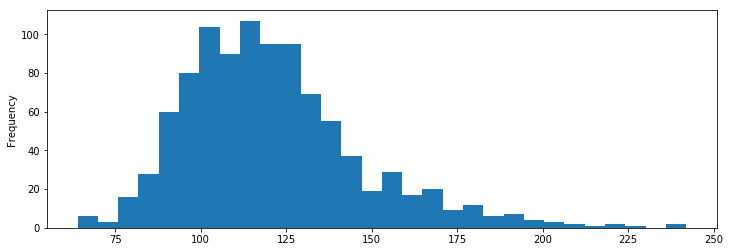

In [119]:
movies.duration.plot(kind='hist', bins= 30, figsize = (12,4));

#### Use a box plot to display that same data.

In [120]:
import seaborn as sns

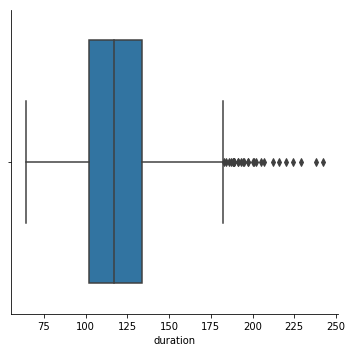

In [121]:
sns.catplot(x='duration', kind='box', data=movies);

## Intermediate level

#### Count how many movies have each of the content ratings.

In [122]:
movies.content_rating.unique()

array(['R', 'PG-13', 'NOT RATED', 'PG', 'UNRATED', 'APPROVED', 'PASSED',
       'G', 'X', nan, 'TV-MA', 'GP', 'NC-17'], dtype=object)

In [123]:
movies.groupby('content_rating')['title'].count()

content_rating
APPROVED      47
G             32
GP             3
NC-17          7
NOT RATED     65
PASSED         7
PG           123
PG-13        189
R            460
TV-MA          1
UNRATED       38
X              4
Name: title, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

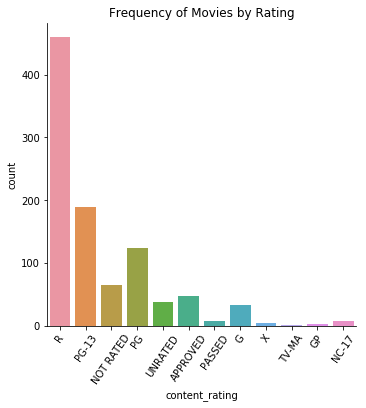

In [124]:
sns.catplot(x='content_rating', kind='count', data=movies);
plt.title('Frequency of Movies by Rating');
plt.xticks(rotation=55);

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [125]:
new_vals = {
    'NOT RATED': 'UNRATED',
    'APPROVED': 'UNRATED',
    'PASSED': 'UNRATED',
    'GP': 'UNRATED',
    'R': 'R',
    'PG-13': 'PG-13',
    'PG': 'PG',
    'G': 'G',
    'X': 'X',
    'TV-MA': 'TV-MA',
    'NC-17': 'NC-17',
    'UNRATED': 'UNRATED'
}

movies['content_rating'] = movies['content_rating'].map(new_vals)

In [126]:
movies.content_rating.unique()

array(['R', 'PG-13', 'UNRATED', 'PG', 'G', 'X', nan, 'TV-MA', 'NC-17'],
      dtype=object)

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [127]:
new_vals = {
    'NOT RATED': 'UNRATED',
    'APPROVED': 'UNRATED',
    'PASSED': 'UNRATED',
    'GP': 'UNRATED',
    'R': 'R',
    'PG-13': 'PG-13',
    'PG': 'PG',
    'G': 'G',
    'X': 'NC-17',
    'TV-MA': 'NC-17',
    'NC-17': 'NC-17',
    'UNRATED': 'UNRATED'
}

movies['content_rating'] = movies['content_rating'].map(new_vals)

In [128]:
movies.content_rating.unique()

array(['R', 'PG-13', 'UNRATED', 'PG', 'G', 'NC-17', nan], dtype=object)

In [129]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Count the number of missing values in each column.

In [130]:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [131]:
movies[movies.content_rating.isnull()]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [140]:
movies[movies.title == 'Butch Cassidy and the Sundance Kid'] = movies[movies.title == 'Butch Cassidy and the Sundance Kid'].fillna(value='PG')

In [142]:
movies[movies.title == 'Where Eagles Dare'] = movies[movies.title == 'Where Eagles Dare'].fillna(value='PG')

In [144]:
movies[movies.title == 'True Grit'] = movies[movies.title == 'True Grit'].fillna(value='PG-13')

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [146]:
movies[movies.duration >= 120].star_rating.mean()

7.948898678414082

In [147]:
movies[movies.duration < 120].star_rating.mean()

7.838666666666657

#### Use a visualization to detect whether there is a relationship between duration and star rating.

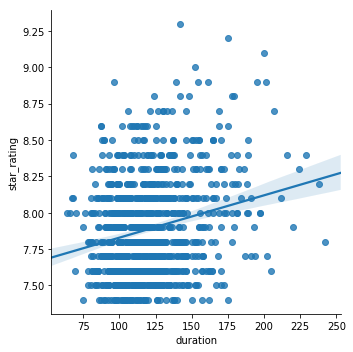

In [149]:
sns.lmplot(x='duration', y='star_rating', data=movies);

#### Calculate the average duration for each genre.

In [150]:
movies.groupby('genre')['duration'].mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

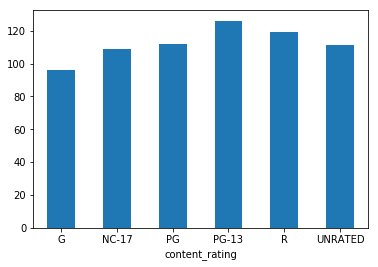

In [196]:
movies.groupby('content_rating')['duration'].median().plot(kind='bar');
plt.xticks(rotation=0);

#### Determine the top rated movie (by star rating) for each genre.

In [182]:
movies.groupby('genre')['star_rating'].max()

genre
Action       9.0
Adventure    8.9
Animation    8.6
Biography    8.9
Comedy       8.6
Crime        9.3
Drama        8.9
Family       7.9
Fantasy      7.7
Film-Noir    8.3
History      8.0
Horror       8.6
Mystery      8.6
Sci-Fi       8.2
Thriller     8.0
Western      8.9
Name: star_rating, dtype: float64

In [257]:
movies[((movies.genre == 'Action') & (movies.star_rating == 9.0)) | ((movies.genre == 'Adventure') & (movies.star_rating == 8.9)) | ((movies.genre == 'Animation') & (movies.star_rating == 8.6)) | ((movies.genre == 'Biography') & (movies.star_rating == 8.9)) | ((movies.genre == 'Comedy') & (movies.star_rating == 8.6)) | ((movies.genre == 'Crime') & (movies.star_rating == 9.3)) | ((movies.genre == 'Drama') & (movies.star_rating == 8.9)) | ((movies.genre == 'Family') & (movies.star_rating == 7.9)) | ((movies.genre == 'Fantasy') & (movies.star_rating == 7.7)) | ((movies.genre == 'Film-Noir') & (movies.star_rating == 8.3)) | ((movies.genre == 'History') & (movies.star_rating == 8.0)) | ((movies.genre == 'Horror') & (movies.star_rating == 8.6)) | ((movies.genre == 'Mystery') & (movies.star_rating == 8.6)) | ((movies.genre == 'Sci-Fi') & (movies.star_rating == 8.2)) | ((movies.genre == 'Thriller') & (movies.star_rating == 8.0)) | ((movies.genre == 'Western') & (movies.star_rating == 8.9))]

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
5,8.9,12 Angry Men,UNRATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",UNRATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
25,8.6,Life Is Beautiful,PG-13,Comedy,116,"[u'Roberto Benigni', u'Nicoletta Braschi', u'G..."
29,8.6,City Lights,UNRATED,Comedy,87,"[u'Charles Chaplin', u'Virginia Cherrill', u'F..."
30,8.6,Spirited Away,PG,Animation,125,"[u'Daveigh Chase', u'Suzanne Pleshette', u'Miy..."


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [184]:
movies.title.nunique()

975

In [254]:
movies.title.count()

979

In [249]:
movies[movies.title.duplicated()]

,star_rating,title,content_rating,genre,duration,actors_list
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,PG-13,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [252]:
movies[(movies.title == 'True Grit') | (movies.title == 'The Girl with the Dragon Tattoo') | (movies.title == 'Dracula') | (movies.title == 'Les Miserables')]

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,PG-13,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [ ]:
#all four titles have two movies that were made years apart

#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [307]:
movies.groupby('genre')['star_rating'].mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Family       7.850000
Fantasy      7.700000
Film-Noir    8.033333
History      8.000000
Horror       7.806897
Mystery      7.975000
Sci-Fi       7.920000
Thriller     7.680000
Western      8.255556
Name: star_rating, dtype: float64

In [326]:
movies.groupby('genre').star_rating.nunique().iloc[np.where(movies.groupby('genre').star_rating.nunique() >= 10)]

genre
Action       16
Adventure    15
Animation    13
Biography    15
Comedy       13
Crime        18
Drama        16
Horror       10
Mystery      11
Name: star_rating, dtype: int64

In [358]:
movies[movies.genre == 'Action'].star_rating.mean()

7.88455882352942

In [359]:
movies[movies.genre == 'Adventure'].star_rating.mean()

7.933333333333332

In [360]:
movies[movies.genre == 'Animation'].star_rating.mean()

7.914516129032259

In [361]:
movies[movies.genre == 'Biography'].star_rating.mean()

7.862337662337664

In [362]:
movies[movies.genre == 'Comedy'].star_rating.mean()

7.82243589743591

In [363]:
movies[movies.genre == 'Crime'].star_rating.mean()

7.916935483870971

In [364]:
movies[movies.genre == 'Drama'].star_rating.mean()

7.902517985611515

In [365]:
movies[movies.genre == 'Horror'].star_rating.mean()

7.8068965517241375

In [366]:
movies[movies.genre == 'Mystery'].star_rating.mean()

7.975

#### Option 4: aggregate by count and mean, then filter using the count

## Bonus

#### Figure out something "interesting" using the actors data!